# Price Impact Demo

### LOB overview

 In this demo we will use cleaned LOB data (from the 'cleaned_data' folder) obtained by running 'preprocessing.py' on the raw LOBSTER files. We will review the empirical properties of returns analysed in Week 3.


In [4]:
#import libraries
import glob
import pandas as pd
import numpy as np
import scipy.stats.distributions as sts
from scipy.stats import norm
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt


Let us focus first on a single stock. Put the stocks data in a folder named 'Stocks'

In [51]:
stock = 'TSLA'

In [52]:
all_files = glob.glob(f"/Users/Matthew/Desktop/repositories/microstructure/ReturnsDemo25/Stocks/{stock}/cleaned_data/*.*")
all_files

['/Users/Matthew/Desktop/repositories/microstructure/ReturnsDemo25/Stocks/TSLA/cleaned_data/TSLA_2019-01-03_34200000_57600000_orderbook_10.csv']

In [53]:
df = pd.read_csv(all_files[0])
df.columns

Index(['DateTime', 'Event_Type', 'Order_ID', 'Size', 'Price', 'Direction',
       'Ask_Price_Level_1', 'Ask_Volume_Level_1', 'Bid_Price_Level_1',
       'Bid_Volume_Level_1', 'Ask_Price_Level_2', 'Ask_Volume_Level_2',
       'Bid_Price_Level_2', 'Bid_Volume_Level_2', 'Ask_Price_Level_3',
       'Ask_Volume_Level_3', 'Bid_Price_Level_3', 'Bid_Volume_Level_3',
       'Ask_Price_Level_4', 'Ask_Volume_Level_4', 'Bid_Price_Level_4',
       'Bid_Volume_Level_4', 'Ask_Price_Level_5', 'Ask_Volume_Level_5',
       'Bid_Price_Level_5', 'Bid_Volume_Level_5', 'Ask_Price_Level_6',
       'Ask_Volume_Level_6', 'Bid_Price_Level_6', 'Bid_Volume_Level_6',
       'Ask_Price_Level_7', 'Ask_Volume_Level_7', 'Bid_Price_Level_7',
       'Bid_Volume_Level_7', 'Ask_Price_Level_8', 'Ask_Volume_Level_8',
       'Bid_Price_Level_8', 'Bid_Volume_Level_8', 'Ask_Price_Level_9',
       'Ask_Volume_Level_9', 'Bid_Price_Level_9', 'Bid_Volume_Level_9',
       'Ask_Price_Level_10', 'Ask_Volume_Level_10', 'Bid_Price_Leve

#Q1: calculate the mid-price and add an extra column to the dataframe to store it.

In [54]:
df.DateTime = pd.to_datetime(df.DateTime, format='%Y-%m-%d %H:%M:%S:%f')
df['MidPrice'] = (df.Ask_Price_Level_1 + df.Bid_Price_Level_1)/2

In [55]:
df.head(3)

,DateTime,Event_Type,Order_ID,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,...,Bid_Volume_Level_8,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10,MidPrice
0,2019-01-03 09:30:00.708346,1,13167276.0,50,3065300.0,1,307.2,1000,307.0,244,...,12,308.12,200,306.0,135,308.24,100,305.6,1,307.1
1,2019-01-03 09:30:00.716851,4,NaN,25,3070000.0,1,307.2,1000,307.0,219,...,12,308.12,200,306.0,135,308.24,100,305.6,1,307.1
2,2019-01-03 09:30:00.716886,4,NaN,128,3070000.0,1,307.2,1000,307.0,91,...,12,308.12,200,306.0,135,308.24,100,305.6,1,307.1


#Q2: plot mid-price in time (you can use plt.plot) 

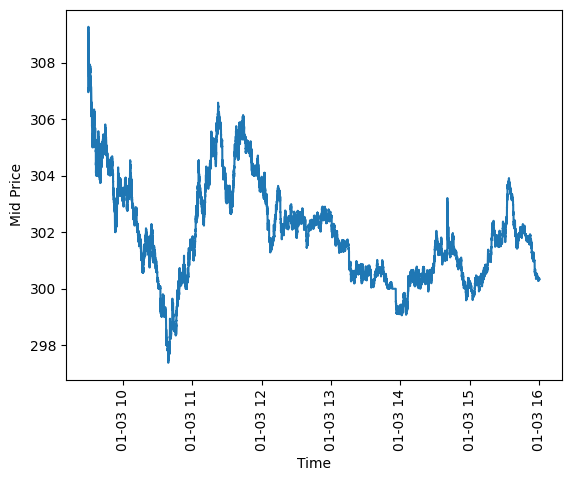

In [56]:
plt.plot(df.DateTime, df.MidPrice)
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.xticks(rotation=90)
plt.show()

#Q3: calculate the mean spread, what information does the spread provide?

In [57]:
average_spread = np.mean(df.Ask_Price_Level_1 - df.Bid_Price_Level_1)
print(f"Average spread for stock {stock}: {round(average_spread, 2)}")

Average spread for stock TSLA: 0.18


#Q4: provide a definition of tick size (Tau) for NASDAQ and check it is corresponds to what is observed from the data. Tau is the minimum price increment allowed. In Nasdaq tau=0.01.


In [58]:
prices_volumes = df.iloc[:, 6:-1]
print(prices_volumes)
prices_ask_side = prices_volumes.iloc[:, 0::4]
prices_bid_side = prices_volumes.iloc[:, 2::4]

flatten_ask_diff = np.array(prices_ask_side.diff(axis=1).iloc[:, 1:]).flatten()
flatten_bid_diff = np.array(prices_bid_side.diff(axis=1).iloc[:, 1:]).flatten()

flatten_bid_ask = np.concatenate((flatten_ask_diff, flatten_bid_diff))

empirical_tick_size = np.mean(np.abs(flatten_bid_ask))
min_increment  = np.min(np.abs(flatten_bid_ask))
print(f"Empirical tick size for stock {stock}: {(empirical_tick_size)}")
print(f"Min price increment {stock}: {round(min_increment,3)}")

        Ask_Price_Level_1  Ask_Volume_Level_1  Bid_Price_Level_1  \
0                  307.20                1000             307.00   
1                  307.20                1000             307.00   
2                  307.20                1000             307.00   
3                  307.20                1000             306.99   
4                  307.20                1000             306.99   
...                   ...                 ...                ...   
546073             300.36                1100             300.35   
546074             300.36                1100             300.35   
546075             300.36                1100             300.35   
546076             300.36                1100             300.35   
546077             300.36                1100             300.35   

        Bid_Volume_Level_1  Ask_Price_Level_2  Ask_Volume_Level_2  \
0                      244             307.25                   1   
1                      219             307.25

In [13]:
prices_volumes

,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,Ask_Price_Level_2,Ask_Volume_Level_2,Bid_Price_Level_2,Bid_Volume_Level_2,Ask_Price_Level_3,Ask_Volume_Level_3,...,Bid_Price_Level_8,Bid_Volume_Level_8,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10
0,100.10,40,100.01,101,100.20,1650,100.00,4909,100.22,100,...,99.35,100,100.47,50,99.30,1516,100.50,472,99.03,103
1,100.10,40,100.01,101,100.20,1660,100.00,4909,100.22,100,...,99.35,100,100.47,50,99.30,1516,100.50,472,99.03,103
2,100.10,40,100.01,101,100.20,1660,100.00,4909,100.22,200,...,99.35,100,100.47,50,99.30,1516,100.50,472,99.03,103
3,100.10,40,100.01,101,100.20,1650,100.00,4909,100.22,200,...,99.35,100,100.47,50,99.30,1516,100.50,472,99.03,103
4,100.10,40,100.01,101,100.20,1650,100.00,4909,100.22,200,...,99.35,100,100.47,50,99.30,1516,100.50,472,99.03,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040055,97.38,100,97.35,9000,97.39,100,97.34,31850,97.40,300,...,97.28,4100,97.46,200,97.27,29900,97.47,600,97.26,50
2040056,97.38,100,97.35,9000,97.39,100,97.34,31850,97.40,300,...,97.28,4100,97.46,200,97.27,29900,97.47,600,97.26,50
2040057,97.38,100,97.35,9000,97.39,100,97.34,31850,97.40,300,...,97.28,4100,97.46,200,97.27,29900,97.47,600,97.26,50
2040058,97.38,100,97.35,9000,97.39,100,97.34,29450,97.40,300,...,97.28,4100,97.46,200,97.27,29900,97.47,600,97.26,50


In [14]:
relative_tick=0.01/np.mean(df.MidPrice)
relative_tick_rounded = round(relative_tick, 4)
print(f"Relative Tick: {relative_tick_rounded}")

Relative Tick: 0.0001


The stock appear to be a small tick stock as the relative tick is < 0.001 and the average spread is > 3\tau

# Returns

We can define multiple types of returns in LOB. Each of them has a different meaning. Here we will analyse the simplest definition of LOB returns. As a first step we need to group ticks in bins with a fixed time size (e.g. 1s, 10s, 1T, 1H, ...).

In [15]:
bin_size = '10s'
groups_by_secs = df.groupby(pd.Grouper(key='DateTime', freq=bin_size))

In [16]:
group_ticks_len = []
open_mid = []
high_mid = []
low_mid = []
close_mid = []
number_missing_seconds = 0

for k in groups_by_secs:
    if len(k[1] != 0):
        group_ticks_len.append(len(k[1]))
        open_mid.append(list(k[1].MidPrice)[0])
        high_mid.append(max(list(k[1].MidPrice)))
        low_mid.append(min(list(k[1].MidPrice)))
        close_mid.append(list(k[1].MidPrice)[-1])
    else:
        number_missing_seconds += 1

In [17]:
print(f"Average bins length: {round(np.mean(group_ticks_len), 2)} ticks.")
print(f"Std bins' length: {round(np.std(group_ticks_len), 2)} ticks.")
print(f"Number of missing bins (={bin_size}) in one trading day: {number_missing_seconds}")
print(f"Average mid price: {round(np.mean(close_mid), 2)}$")

Average bins length: 871.82 ticks.
Std bins' length: 377.4 ticks.
Number of missing bins (=10s) in one trading day: 0
Average mid price: 98.43$


Let's transform bins into OHLC (open, high, low, close) data.

In [18]:
ohlc = pd.DataFrame({'Open':open_mid, 'High':high_mid, 'Low':low_mid, 'Close':close_mid})

In [19]:
log_rets = np.log(ohlc.Close / ohlc.Close.shift(1)).dropna()

In [20]:
log_rets

1      -0.000750
2      -0.000250
3      -0.000250
4       0.000400
5      -0.000400
          ...   
2335   -0.001538
2336   -0.000103
2337   -0.000821
2338   -0.001285
2339    0.001387
Name: Close, Length: 2339, dtype: float64

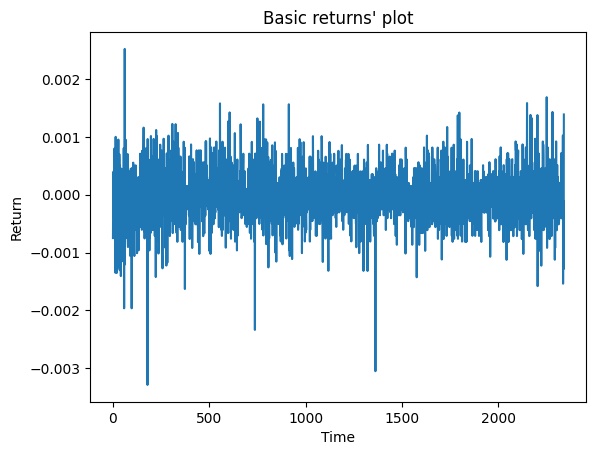

In [21]:
plt.plot(log_rets)
plt.xlabel('Time')
plt.ylabel('Return')
plt.title("Basic returns' plot")
plt.show()

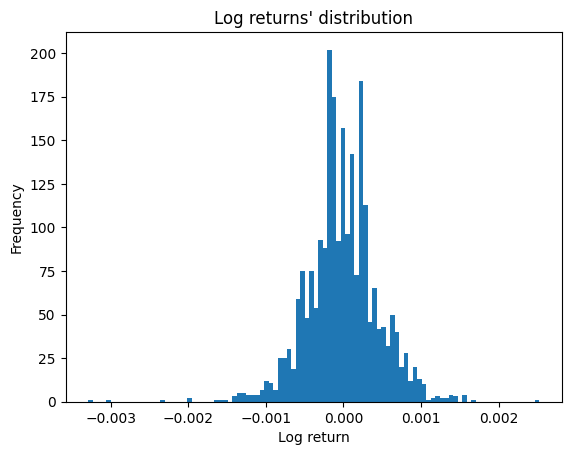

In [22]:
plt.hist(log_rets, bins=100)
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.title("Log returns' distribution")
plt.show()

Let's try to study normality of returns' distribution based on the empirical kurtosis.

In [23]:
def compute_empirical_kurtosis(arr):
    mean_ = np.mean(arr)
    mu2 = np.mean((arr-mean_)**2)
    mu4 = np.mean((arr - mean_)**4)
    kurtosis = (mu4 / (mu2**2))-3
    return kurtosis

In [24]:
print(f"Empirical kurtosis of {stock} stock's returns is equal to {round(compute_empirical_kurtosis(log_rets), 2)}.")

Empirical kurtosis of MSFT stock's returns is equal to 3.06.


Let's now come back to our returns.

In [25]:
absolute_log_rets = np.abs(np.array(log_rets))
lags = range(100)

In [26]:
# Pre-allocate autocorrelation table
acorr = len(lags) * [0]

# Mean
mean = sum(absolute_log_rets) / len(absolute_log_rets) 

# Variance
var = sum([(x - mean)**2 for x in absolute_log_rets]) / len(absolute_log_rets) 

# Normalized data
ndata = [x - mean for x in absolute_log_rets]

for l in lags:
    c = 1
    
    if (l > 0):
        tmp = [ndata[l:][i] * ndata[:-l][i] 
               for i in range(len(ndata) - l)]
        c = sum(tmp) / (len(ndata)) / var
        
    acorr[l] = c

Text(0, 0.5, 'Correlation')

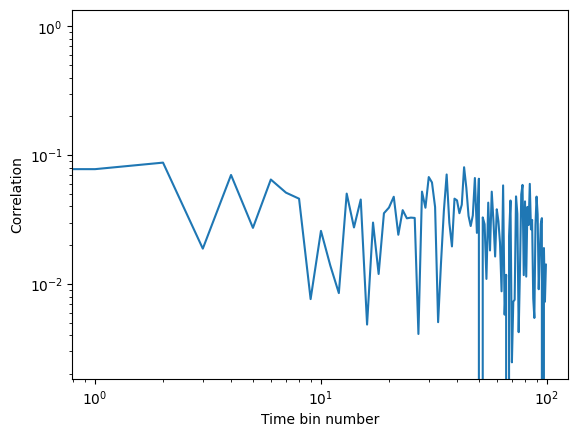

In [27]:
plt.plot(acorr)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time bin number')
plt.ylabel('Correlation')

Let's now compute the same quantities using a library.

In [28]:
acorr = sm.tsa.acf(absolute_log_rets, nlags = len(lags)-1)

Text(0, 0.5, 'Correlation')

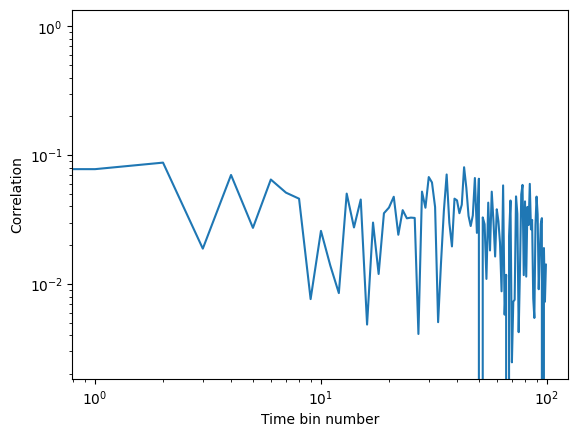

In [29]:
plt.plot(acorr)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time bin number')
plt.ylabel('Correlation')

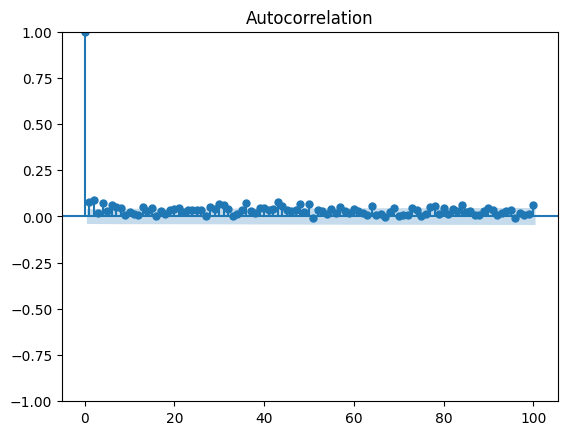

In [30]:
sm.graphics.tsa.plot_acf(absolute_log_rets, lags=100, alpha=0.05)
plt.show()

# Order Flow autocorrelation

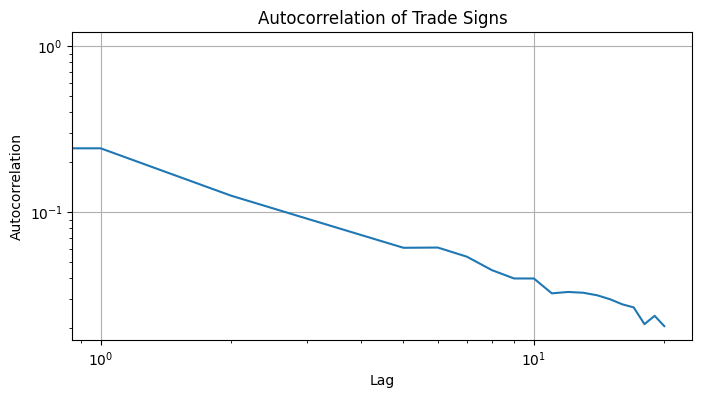

In [31]:
from statsmodels.tsa.stattools import acf

# Only keep signs of trades (e.g., Type == 4 or 5 for executions)
trade_signs = df[df['Event_Type'].isin([4, 5])]['Direction'].dropna().astype(int)

# Compute autocorrelation
sign_acf = acf(trade_signs, nlags=20, fft=True)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(len(sign_acf)), sign_acf)
plt.title("Autocorrelation of Trade Signs")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [32]:
def compute_sign_acf_manual(signs, max_lag):
    n = len(signs)
    mean = sum(signs) / n
    var = sum((s - mean) ** 2 for s in signs) / n

    acf = []
    for lag in range(max_lag + 1):
        cov = sum((signs[t] - mean) * (signs[t + lag] - mean)
                  for t in range(n - lag)) / (n - lag)
        acf.append(cov / var)
    return acf

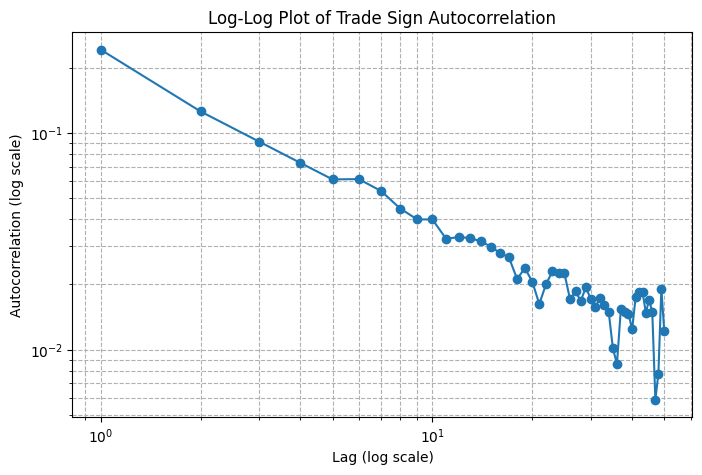

In [33]:
signs = df[df['Event_Type'].isin([4, 5])]['Direction'].dropna().astype(int).tolist()
acf_vals = compute_sign_acf_manual(signs, max_lag=50)
lags = np.arange(1, len(acf_vals))  # skip lag 0
acf_values = np.array(acf_vals[1:])  # skip lag 0 value

plt.figure(figsize=(8, 5))
plt.loglog(lags, np.abs(acf_values), marker='o', linestyle='-')
plt.xlabel('Lag (log scale)')
plt.ylabel('Autocorrelation (log scale)')
plt.title('Log-Log Plot of Trade Sign Autocorrelation')
plt.grid(True, which='both', ls='--')
plt.show()

 # Lag-1 response

Let us now calculate the lag-1 response for market orders and compare it to spread fluctuations and price fluctuations 

In [37]:
from IPython.display import Image
Image("r1.png")

FileNotFoundError: No such file or directory: 'r1.png'

FileNotFoundError: No such file or directory: 'r1.png'

<IPython.core.display.Image object>

In [38]:
def calculate_lag1_response(data):
    """
    Will need for exam I think
    Compute lag-1 price response:
    R(1) = < epsilon_t * (m_{t+1} - m_{t-1}) >
    
    Assumes:
    - row i is the market order event
    - row i-1 is the LOB state before the MO (m_t)
    - row i+1 is the LOB state after the MO (m_{t+1})
    
    Parameters:
    - data: DataFrame with ['Event_Type', 'Ask_Price_Level_1', 'Bid_Price_Level_1', 'Direction']
    
    Returns:
    - avg_spread, R1, sigma_r, NMO
    """
    avg_spread = 0
    R1 = 0
    V1 = 0
    NMO = 0

    # Ensure MidPrice column exists
    if 'MidPrice' not in data.columns:
        data['MidPrice'] = (data['Ask_Price_Level_1'] + data['Bid_Price_Level_1']) / 2



    # Iterate from 1 to len-1 to access i-1 and i+1 safely
    for i in range(1, len(data) - 1):
        row = data.iloc[i]
        prev_row = data.iloc[i - 1]
        next_row = data.iloc[i + 1]

        if row['Event_Type'] in [4, 5]:  # Market order
            sign = row['Direction']  # +1 or -1

            m_before = prev_row['MidPrice']
            m_after = next_row['MidPrice']
            spread_before = prev_row['Ask_Price_Level_1'] - prev_row['Bid_Price_Level_1']

            r_signed = sign * (m_after - m_before)

            avg_spread += spread_before
            R1 += r_signed
            V1 += (m_after - m_before) ** 2
            NMO += 1

    if NMO > 0:
        avg_spread /= NMO
        R1 /= NMO
        V1 /= NM0
        sigma_r = np.sqrt(V1 - R1 ** 2)
    else:
        avg_spread = R1 = sigma_r = 0

    return avg_spread, R1, sigma_r, NMO


In [39]:
print(f"Average Spread: {avg_spread}")
print(f"Lag-1 Price Response: {R1}")
print(f"Volatility Measure (Sigma_r): {sigma_r}")
print(f"Number of Market Orders: {NMO}")

NameError: name 'avg_spread' is not defined

In [40]:
# Average mid-price
avg_mid = df['MidPrice'].mean()

# Convert to basis points
spread_bps = (avg_spread / avg_mid) * 1e4
R1_bps = (R1 / avg_mid) * 1e4
sigma_r_bps = (sigma_r / avg_mid) * 1e4

print(f"Average Spread: {spread_bps:.2f} bps")
print(f"Lag-1 Response R(1): {R1_bps:.2f} bps")
print(f"Volatility Sigma_r: {sigma_r_bps:.2f} bps")

NameError: name 'avg_spread' is not defined

# Order flow imbalance

In [41]:
def compute_ofi(df):
    """
    Compute Order Flow Imbalance (OFI) using Cont-Stoikov definition.

    Parameters:
    df : pandas DataFrame with columns 'Bid_Volume_Level_1' and 'Ask_Volume_Level_1'

    Returns:
    A pandas Series with OFI values.
    """
    delta_bid = df['Bid_Volume_Level_1'].diff()
    delta_ask = df['Ask_Volume_Level_1'].diff()

    # OFI = change in bid volume - change in ask volume
    ofi = delta_bid - delta_ask

    return ofi


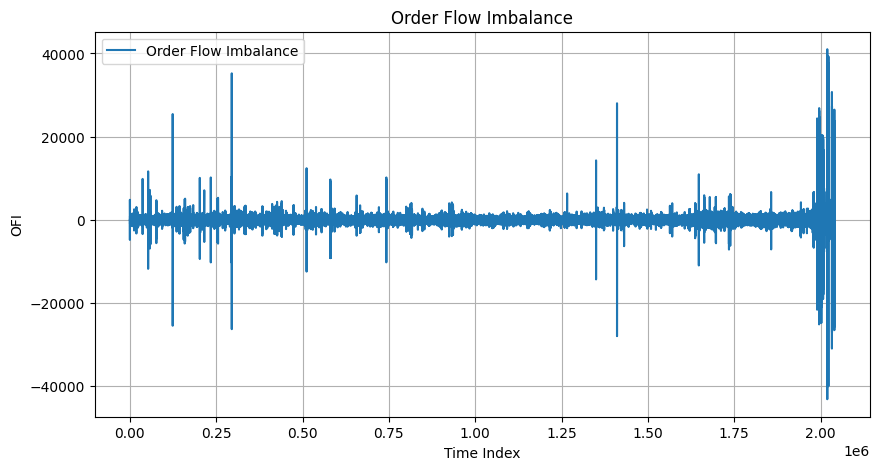

In [42]:
df['OFI'] = compute_ofi(df)

# Optional: plot the time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['OFI'], label='Order Flow Imbalance')
plt.title('Order Flow Imbalance')
plt.xlabel('Time Index')
plt.ylabel('OFI')
plt.grid(True)
plt.legend()
plt.show()



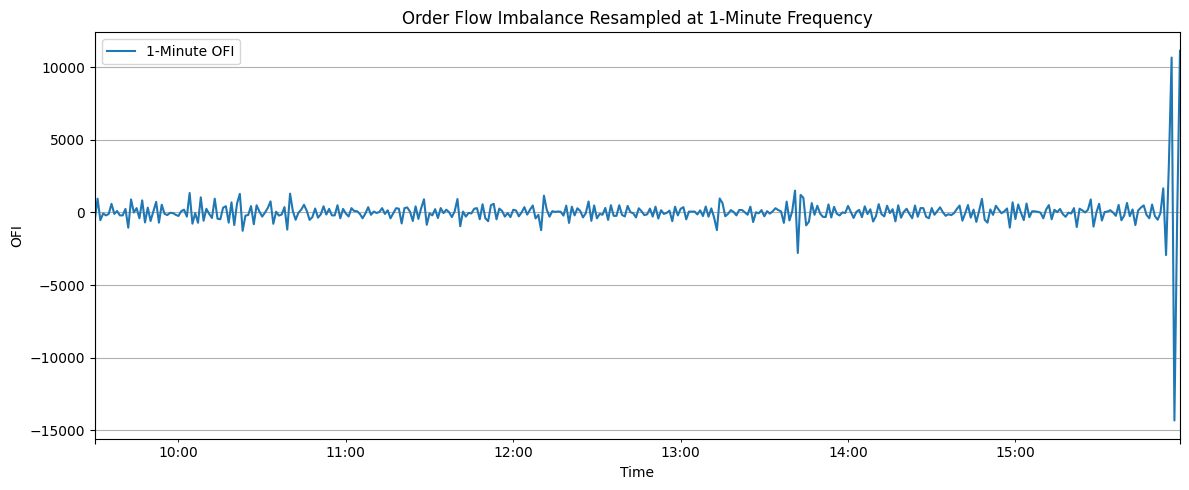

In [43]:
# Ensure datetime is the index
df.set_index('DateTime', inplace=True, drop=False)

# Resample using sum (total imbalance per interval)
ofi_1min = df['OFI'].resample('1Min').sum()

# Or mean OFI per minute
ofi_1min_mean = df['OFI'].resample('1Min').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
ofi_1min.plot(label='1-Minute OFI')
plt.title('Order Flow Imbalance Resampled at 1-Minute Frequency')
plt.xlabel('Time')
plt.ylabel('OFI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



We now calculate the aggregate price impact of MO over a time window T (in number of events)

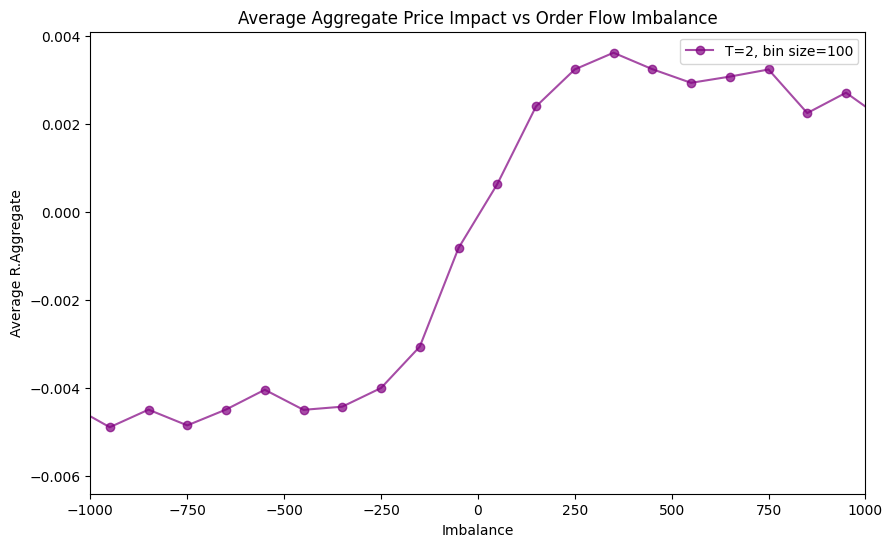

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_aggregate_impact_and_imbalance(data, T, bin_size=100):
    """
    Calculate aggregate impact and order flow imbalance over windows of T market orders (event types 4/5),
    and group imbalances into bins for averaging.
    
    Parameters:
    - data: pandas DataFrame containing relevant columns for market orders, volumes, and prices.
    - T: The number of market orders in each window (time window for aggregation).
    - bin_size: The size of the imbalance bins for grouping and averaging.
    
    Returns:
    - binned_imbalances: The midpoints of the bins used for averaging.
    - average_impacts: The average aggregate impacts for each imbalance bin.
    """
    
    imbalance_list = []
    impact_list = []
    
    # Filter the DataFrame to include only market orders (event types 4 and 5)
    market_orders = data[(data['Event_Type'] == 4) | (data['Event_Type'] == 5)]
    
    # Loop through the filtered market orders in windows of T events
    for i in range(0, len(market_orders) - T, T):
        window = market_orders.iloc[i:i + T]        
        
        
        # Calculate order flow imbalance as the sum of buy volumes minus the sum of sell volumes
        buy_volume = window[window['Direction'] == 1]['Size'].sum()
        sell_volume = window[window['Direction'] == -1]['Size'].sum()
        imbalance =  sell_volume-buy_volume
        # Check if the window has T rows
        if len(window) == T:
        # Calculate aggregate price impact: difference in mid-price over the window
            price_start = window.iloc[0]['MidPrice']
            price_end = window.iloc[-1]['MidPrice']

        # Adjust the impact based on direction (positive for buys, negative for sells)
            impact = (price_end - price_start) 
        else:
            print(f"Window size is less than expected at index {i}")

        # if i // T < 10:  # Print only for the first 3 windows
        #     print(f"Window {i // T + 1} Prices: {window['MidPrice'].values}")
        #     print(f"Window {i // T + 1} Start Price: {price_start}")
        #     print(f"Window {i // T + 1} End Price: {price_end}")
        #     print(f"Window {i // T + 1} Volume Imbalance: {imbalance}")
        #     print(f"Window {i // T + 1} Sell Volume: {sell_volume}")
        #     print(f"Window {i // T + 1} Buy Volume: {buy_volume}")
        #     print(f"Window {i // T + 1} Impact: {impact}")
    
        #     print("-----------")
    
    
        
        # Store the results
        imbalance_list.append(imbalance)
        impact_list.append(impact)
    
    # Convert lists to arrays for easier manipulation
    imbalance_list = np.array(imbalance_list)
    impact_list = np.array(impact_list)
    
    # Bin the imbalances for averaging
    bins = np.arange(-2000, 2000 + bin_size, bin_size)  # Define bins between -1000 and 1000 with size `bin_size`
    binned_indices = np.digitize(imbalance_list, bins)
    
    # Calculate the average impact for each bin
    average_impacts = []
    binned_imbalances = []

    for bin_num in range(1, len(bins)):
        bin_impacts = impact_list[binned_indices == bin_num]
        if len(bin_impacts) > 0:
            avg_impact = np.mean(bin_impacts)
            average_impacts.append(avg_impact)
            # Calculate the midpoint of each bin
            bin_midpoint = (bins[bin_num] + bins[bin_num - 1]) / 2
            binned_imbalances.append(bin_midpoint)
    
    return np.array(binned_imbalances), np.array(average_impacts)

# Example usage
T = 2  # Time window of T market orders
bin_size = 100  # Set bin size for imbalance

# Assuming df is the DataFrame containing the relevant market order data
# Call the function to calculate aggregate impact and imbalance, averaged by bins
binned_imbalances, average_impacts = calculate_aggregate_impact_and_imbalance(df, T, bin_size)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(binned_imbalances, average_impacts, '-o', color='purple', alpha=0.7, label=f'T={T}, bin size={bin_size}')
plt.xlabel('Imbalance')
plt.ylabel('Average R.Aggregate')
plt.title('Average Aggregate Price Impact vs Order Flow Imbalance')
plt.xlim([-1000, 1000])  # Limit x-axis to -1000 to 1000
plt.legend(loc='best')
plt.show()


We can check what are the selected events

In [45]:
def plot_events(data, T):
    
    
    imbalance_list = []
    impact_list = []
    
    # Filter the DataFrame to include only market orders (event types 4 and 5)
    market_orders = data[(data['Event_Type'] == 4) | (data['Event_Type'] == 5)]
    
    # Loop through the filtered market orders in windows of T events
    for i in range(0, len(market_orders) - T, T):
        window = market_orders.iloc[i:i + T]        
        
        
        # Calculate order flow imbalance as the sum of buy volumes minus the sum of sell volumes
        buy_volume = window[window['Direction'] == 1]['Size'].sum()
        sell_volume = window[window['Direction'] == -1]['Size'].sum()
        imbalance =  sell_volume-buy_volume
        # Check if the window has T rows
        if len(window) == T:
        # Calculate aggregate price impact: difference in mid-price over the window
            price_start = window.iloc[0]['MidPrice']
            price_end = window.iloc[-1]['MidPrice']

        # Adjust the impact based on direction (positive for buys, negative for sells)
            impact = (price_end - price_start) 
        else:
            print(f"Window size is less than expected at index {i}")

        plt.figure(figsize=(10, 5))
        plt.plot(window['DateTime'], window['MidPrice'], marker='o', linestyle='-', label="MidPrice")
        plt.title(f"Window {i // T + 1}: MidPrices")
        plt.xlabel("Time")
        plt.ylabel("MidPrice")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
               
        # Stop after the first 3 windows for demonstration
        if i // T == 3:
            break
    

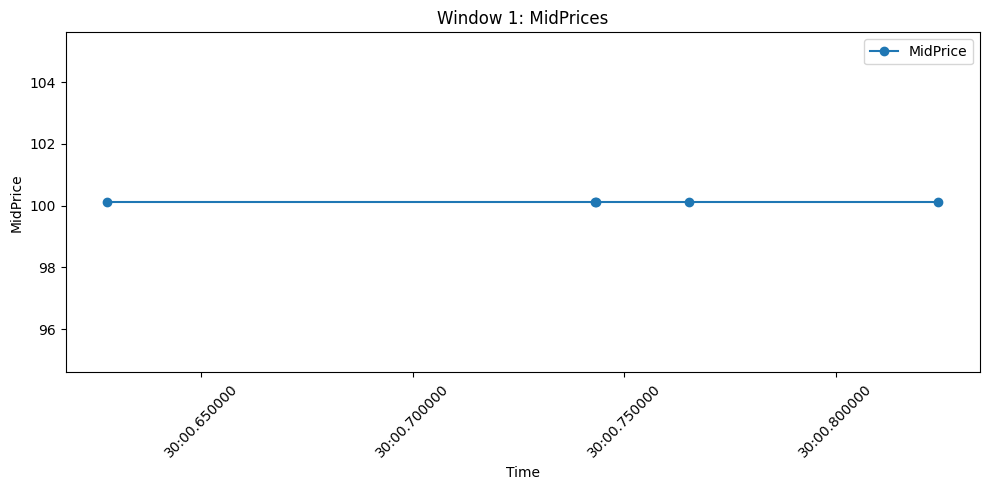

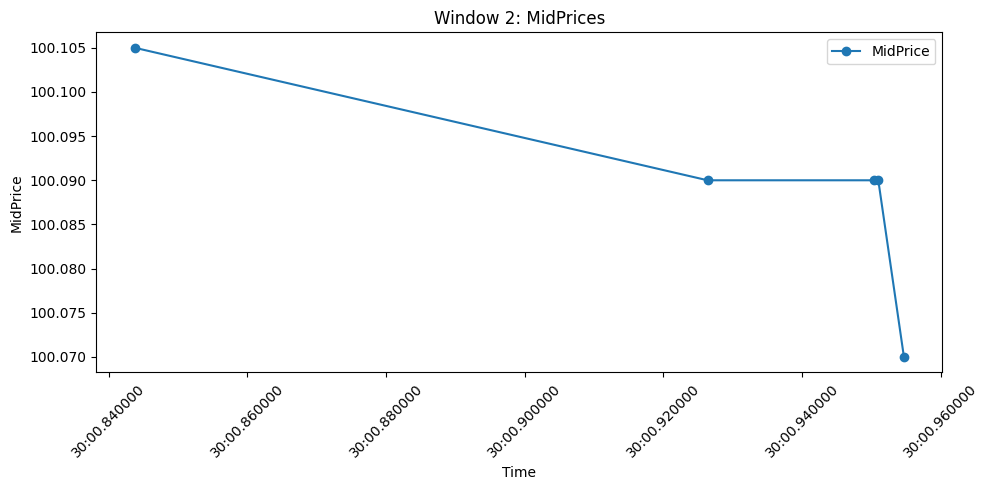

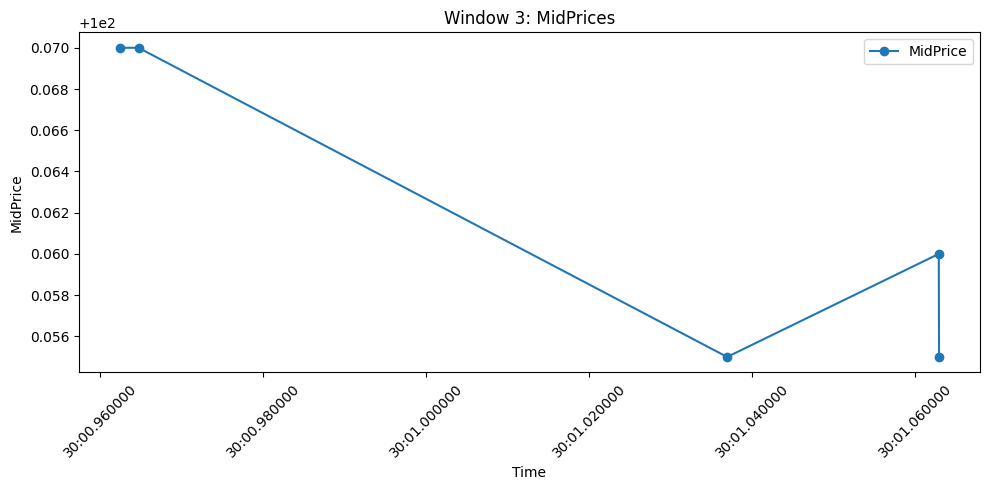

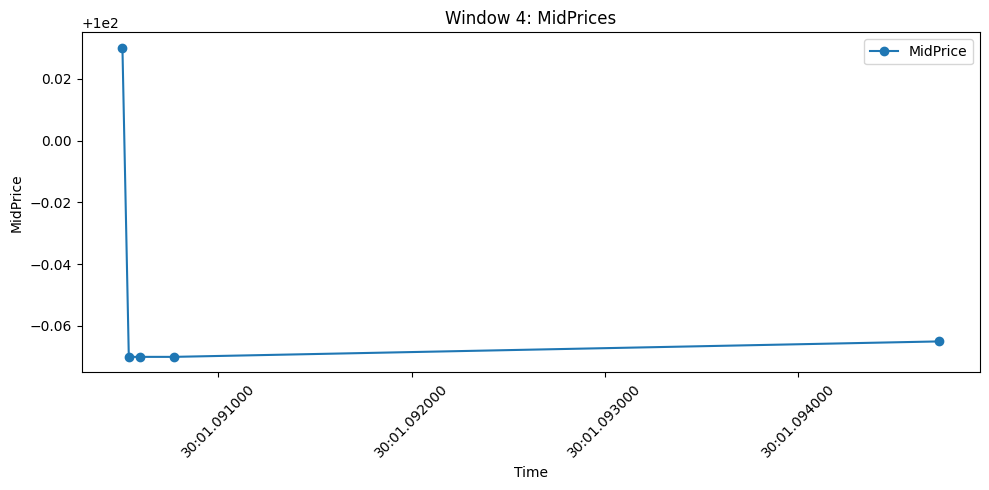

In [46]:
T = 5  # Time window of T market orders

plot_events(df, T)

In [47]:
df.head(1)

,DateTime,Event_Type,Order_ID,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,...,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10,MidPrice,OFI
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 09:30:00.627361,2019-01-03 09:30:00.627361,1,11270095.0,100,1002200.0,-1,100.1,40,100.01,101,...,100.47,50,99.3,1516,100.5,472,99.03,103,100.055,NaN


# Extra

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import mutual_info_regression

# STEP 1: Extract Bid and Ask volume columns
bid_cols = [col for col in df.columns if 'Bid_Volume_Level' in col]
ask_cols = [col for col in df.columns if 'Ask_Volume_Level' in col]

# Sort them numerically by level
bid_cols.sort(key=lambda x: int(x.split('_')[-1]))
ask_cols.sort(key=lambda x: int(x.split('_')[-1]))

# Combine all volume columns
volume_cols = ask_cols + bid_cols
volume_data = df[volume_cols].copy()
volume_data = volume_data.dropna()  # Clean any missing values

# STEP 2: Compute Mutual Information matrix
n = len(volume_cols)
mi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            mi_matrix[i, j] = 1.0
        else:
            x = volume_data.iloc[:, i].values
            y = volume_data.iloc[:, j].values
            mi = mutual_info_regression(x.reshape(-1, 1), y, discrete_features=False)
            mi_matrix[i, j] = mi[0]

# Normalize matrix to [0, 1] for better visualization
mi_matrix = mi_matrix / np.max(mi_matrix)

# STEP 3: Plot as heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(mi_matrix, cmap='Spectral', xticklabels=volume_cols, yticklabels=volume_cols,
            square=True, cbar_kws={'label': 'Mutual Information'}, linewidths=0.2)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mutual Information Matrix between Volume Levels")
plt.tight_layout()
plt.show()



KeyboardInterrupt: 

  Using cached scikit_learn-1.8.0-cp314-cp314-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp314-cp314-macosx_12_0_arm64.whl (8.1 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
